**NAME - prasad**  
**STUDENT ID -21031582**

In [ ]:
pip install wbgapi

In [2]:
import pandas as pd
import wbgapi as wb
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import array, exp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
#Function to load the world indicators
dfrm=pd.read_csv(r"C:\Users\prasa\Downloads\World Indicator Repository.csv", low_memory=False)

In [6]:
#Showing some rows of the data
dfrm.head(7)

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.69999695,96.61613464,97.69999695,97.69999695,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.09197235,95.58617401,97.07563019,97.06671143,..
5,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,99.5,99.62602234,99.5,99.5,..
6,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,14.89331245,..,..,..,..


In [7]:
#Description of the dataset
dfrm.describe()

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
count,1864,1862,1862,1862,1862,1862,1862,1862,1862
unique,268,266,7,7,973,825,798,786,1
top,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,100,100,100,100,..
freq,7,7,266,266,511,507,530,583,1862


In [8]:
#Data in transpose form
dfrm1=dfrm.transpose()
dfrm1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN


In [2]:
ind_id_GDP = ['NY.GDP.MKTP.CD','NE.DAB.TOTL.ZS']
country_codes = ["CHL","GBR",'BGR','DNK','ARG','BRA','CHN','ESP','IND','JAM']
ind_id_Climate=['EG.ELC.ACCS.ZS','EG.USE.ELEC.KH.PC']
data_GDP  = wb.data.DataFrame(ind_id_GDP, country_codes, mrv=7)
data_Climate  = wb.data.DataFrame(ind_id_Climate, country_codes, mrv=7)
#NY.GDP.MKTP.CD    : Current GDP in US$
#NE.DAB.TOTL.ZS : Expenditure
 #EG.ELC.ACCS.ZS	Access to electricity (% of population)	
#EG.USE.ELEC.KH.PC	Electric power consumption (kWh per capita)


In [3]:
# Creating the proper table structure for GDP
data_GDP.columns = [a.replace('YR','') for a in data_GDP.columns]      
data_GDP=data_GDP.stack().unstack(level=1)                             
data_GDP.index.names = ['Country_Code', 'Year']                           
data_GDP.columns                                                     
data_GDP.fillna(0)
data_GDP.head(15)

series             NE.DAB.TOTL.ZS  NY.GDP.MKTP.CD
Country_Code Year                                
ARG          2014       99.595836    5.263197e+11
             2015      101.074922    5.947493e+11
             2016      101.039698    5.575314e+11
             2017      102.649034    6.436287e+11
             2018      101.889164    5.248197e+11
             2019       96.994042    4.519324e+11
             2020       93.070816    3.892881e+11
BGR          2014      101.085516    5.708201e+10
             2015       99.100768    5.078200e+10
             2016       95.092863    5.395390e+10
             2017       95.687406    5.919945e+10
             2018       97.459949    6.636342e+10
             2019       96.771743    6.891542e+10
             2020       96.939132    6.988935e+10
BRA          2014      102.661520    2.456044e+12

In [4]:
data_GDP.head(5)

series             NE.DAB.TOTL.ZS  NY.GDP.MKTP.CD
Country_Code Year                                
ARG          2014       99.595836    5.263197e+11
             2015      101.074922    5.947493e+11
             2016      101.039698    5.575314e+11
             2017      102.649034    6.436287e+11
             2018      101.889164    5.248197e+11

In [5]:
# Creating the proper table structure for Climate
data_Climate.columns = [a.replace('YR','') for a in data_Climate.columns]      
data_Climate=data_Climate.stack().unstack(level=1)                             
data_Climate.index.names = ['Country_Code', 'Year']                           
data_Climate.columns                                                     
data_Climate.fillna(0)
data_Climate.head(15)

series             EG.ELC.ACCS.ZS  EG.USE.ELEC.KH.PC
Country_Code Year                                   
ARG          2014      100.000000        3074.702071
             2015       99.625389                NaN
             2016       99.849579                NaN
             2017      100.000000                NaN
             2018       99.989578                NaN
             2019      100.000000                NaN
             2020      100.000000                NaN
BGR          2014      100.000000        4708.927458
             2015      100.000000                NaN
             2016      100.000000                NaN
             2017      100.000000                NaN
             2018      100.000000                NaN
             2019      100.000000                NaN
             2020       99.699997                NaN
BRA          2014       99.650246        2619.960499

In [6]:
data_Climate.head(15)

series             EG.ELC.ACCS.ZS  EG.USE.ELEC.KH.PC
Country_Code Year                                   
ARG          2014      100.000000        3074.702071
             2015       99.625389                NaN
             2016       99.849579                NaN
             2017      100.000000                NaN
             2018       99.989578                NaN
             2019      100.000000                NaN
             2020      100.000000                NaN
BGR          2014      100.000000        4708.927458
             2015      100.000000                NaN
             2016      100.000000                NaN
             2017      100.000000                NaN
             2018      100.000000                NaN
             2019      100.000000                NaN
             2020       99.699997                NaN
BRA          2014       99.650246        2619.960499

In [7]:
#Adjusting the dataframe
data1=data_GDP.reset_index()
data2=data_Climate.reset_index()
data3=data1.fillna(0)
data4=data2.fillna(0)
data4.head(10)

series,Country_Code,Year,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC
0,ARG,2014,100.000000,3074.702071
1,ARG,2015,99.625389,0.000000
2,ARG,2016,99.849579,0.000000
3,ARG,2017,100.000000,0.000000
4,ARG,2018,99.989578,0.000000
5,ARG,2019,100.000000,0.000000
6,ARG,2020,100.000000,0.000000
7,BGR,2014,100.000000,4708.927458
8,BGR,2015,100.000000,0.000000
9,BGR,2016,100.000000,0.000000


In [8]:
#Joining 2 dataframes
data_concat1 = pd.merge(data3, data4)
data_concat1.head(15)

series,Country_Code,Year,NE.DAB.TOTL.ZS,NY.GDP.MKTP.CD,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC
0,ARG,2014,99.595836,5.263197e+11,100.000000,3074.702071
1,ARG,2015,101.074922,5.947493e+11,99.625389,0.000000
2,ARG,2016,101.039698,5.575314e+11,99.849579,0.000000
3,ARG,2017,102.649034,6.436287e+11,100.000000,0.000000
4,ARG,2018,101.889164,5.248197e+11,99.989578,0.000000
5,ARG,2019,96.994042,4.519324e+11,100.000000,0.000000
6,ARG,2020,93.070816,3.892881e+11,100.000000,0.000000
7,BGR,2014,101.085516,5.708201e+10,100.000000,4708.927458
8,BGR,2015,99.100768,5.078200e+10,100.000000,0.000000
9,BGR,2016,95.092863,5.395390e+10,100.000000,0.000000


In [9]:
#Normalize the values
data_concat2 = data_concat1.iloc[:,2:]
data_concat1.iloc[:,2:] = (data_concat2-data_concat2.min())/ (data_concat2.max() - data_concat2.min())
data_concat1.head(5)

series,Country_Code,Year,NE.DAB.TOTL.ZS,NY.GDP.MKTP.CD,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC
0,ARG,2014,0.235884,0.034843,1.000000,0.524801
1,ARG,2015,0.285813,0.039496,0.976772,0.000000
2,ARG,2016,0.284624,0.036965,0.990673,0.000000
3,ARG,2017,0.338950,0.042819,1.000000,0.000000
4,ARG,2018,0.313299,0.034741,0.999354,0.000000


In [10]:
#Clustering the dataset using K-means
data_val = data_concat1.drop('Country_Code', axis = 1)
kmn = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data_val)

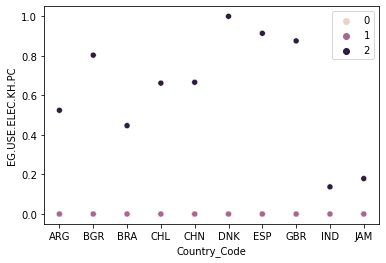

In [11]:
#Clustering the dataset on Electric power consumption
sns.scatterplot(data=data_concat1, x="Country_Code", y="EG.USE.ELEC.KH.PC", hue=kmn.labels_)
plt.legend(loc='best')
plt.show()

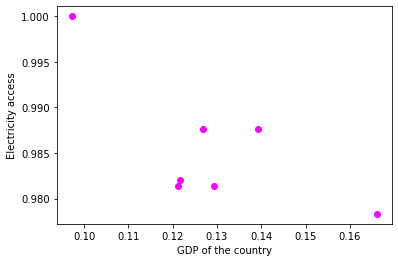

In [12]:
#Scatter plot for GDP, PPP vs greenshouse gas emission
country=data_concat1[(data_concat1['Country_Code']=='BRA')]
fnal = country.values
x, y = fnal[:, 3], fnal[:, 4]
plt.scatter(x, y,color="magenta")
plt.ylabel('Electricity access')
plt.xlabel('GDP of the country')
plt.show()

The covariance is:  [[ 4.38518037e+02 -8.99095490e+01  5.23631028e-01]
 [-8.99095490e+01  1.85839542e+01 -1.09900008e-01]
 [ 5.23631028e-01 -1.09900008e-01  6.72304150e-04]]
The params is:  [30.79747219 -7.1977338   1.03723783]


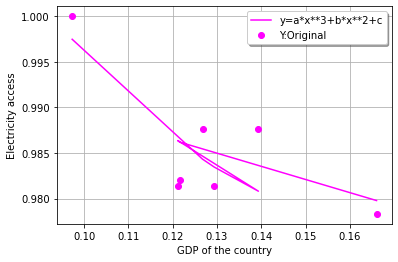

In [13]:
#Implementing the curve_fit function for Brazil which has a medium electric power consumption (kWh per capita)

x, y = fnal[:, 3], fnal[:, 4]
def fu(x, a, b, c):
    return a*x**3+b*x**2+c
para, covar = curve_fit(fu, x, y)
print("The covariance is: ", covar)
print("The params is: ", para)
para, _ = curve_fit(fu, x, y)
a, b, c = para[0], para[1], para[2]
yft = a*x**3+b*x**2+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yft, label="y=a*x**3+b*x**2+c",color="magenta")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y:Original",color="magenta")
    plt.ylabel('Electricity access')
    plt.xlabel('GDP of the country')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

The covariance is:  [[-1.27209039e+02 -3.47267469e-07  8.64712520e-01]
 [-3.47267467e-07  1.53028636e-14  2.36057481e-09]
 [ 8.64712520e-01  2.36057482e-09 -5.87794506e-03]]
The params is:  [ 4.38426040e-06 -7.45826244e-07  9.99999996e-01]


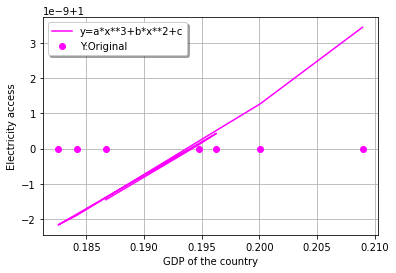

In [17]:
#Implementing the curve_fit function for GBR which has a high electric power consumption (kWh per capita)

country1=data_concat1[(data_concat1['Country_Code']=='GBR')]
fnal1 = country1.values

x, y = fnal1[:, 3], fnal1[:, 4]
def fu(x, a, b, c):
    return a*x**3+b*x**2+c
para, covar = curve_fit(fu, x, y)
print("The covariance is: ", covar)
print("The params is: ", para)
para, _ = curve_fit(fu, x, y)
a, b, c = para[0], para[1], para[2]
yft = a*x**3+b*x**2+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yft, label="y=a*x**3+b*x**2+c",color="magenta")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y:Original",color="magenta")
    plt.ylabel('Electricity access')
    plt.xlabel('GDP of the country')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

The covariance is:  [[ 8.25394189e+05 -2.05391398e+05  1.79840703e+03]
 [-2.05391398e+05  5.11936244e+04 -4.49900755e+02]
 [ 1.79840703e+03 -4.49900755e+02  3.98998096e+00]]
The params is:  [-607.14427681  193.68481396   -2.01812253]


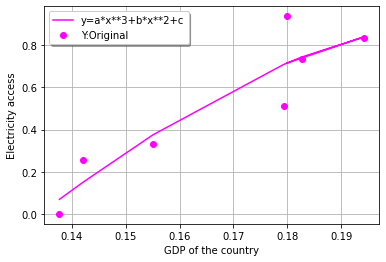

In [18]:
#Implementing the curve_fit function for India which has a low electric power consumption (kWh per capita)

country3=data_concat1[(data_concat1['Country_Code']=='IND')]
fnal3 = country3.values

x, y = fnal3[:, 3], fnal3[:, 4]
def fu(x, a, b, c):
    return a*x**3+b*x**2+c
para, covar = curve_fit(fu, x, y)
print("The covariance is: ", covar)
print("The params is: ", para)
para, _ = curve_fit(fu, x, y)
a, b, c = para[0], para[1], para[2]
yft = a*x**3+b*x**2+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yft, label="y=a*x**3+b*x**2+c",color="magenta")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y:Original",color="magenta")
    plt.ylabel('Electricity access')
    plt.xlabel('GDP of the country')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**The conclusion which can be derived from the above three comparisons is that for country with high and low electric power consumption (kWh per capita), the relationship between electricity access % and GDP of the country is direct. For the country with medium electric power consumption (kWh per capita), the relationship between electricity access % and GDP of the country is indirect.**

In [14]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 